Random Basis Functions Test
===========================

In this notebook we test our random basis functions against the kernel functions they are designed to approximate. This is a qualitative test in that we just plot the inner product of our bases with the kernel evaluations for an array of inputs, i.e., we compare the shapes of the kernels.

We evaluate these kernels in D > 1, since their Fourier transformation may be a function of D.

In [12]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as pl
pl.style.use('ggplot')

from revrand.basis_functions import RandomRBF, RandomLaplace, RandomCauchy, RandomMatern32, RandomMatern52, \
    FastFoodRBF, FastFoodGM
    

## Settings

In [13]:
N = 1000
D = 10  # Kernel dimension
nbases = 1500
lenscale = 1.5
mean = -1.
inrange = 4

# Data
x = np.zeros((N, D))
y = np.tile(np.linspace(-inrange, inrange, N), (D, 1)).T
    

## Kernel functions


In [14]:
def dist(power=2):
    return (np.abs((x - y)**power)).sum(axis=1)

# RBF
def kern_rbf():
    return np.exp(- dist() / (2 * lenscale**2))

# Cauchy
def kern_cau():
    return 1. / (1 + dist() / lenscale**2)

# Laplace
def kern_lap():
    return np.exp(- dist(power=1) / lenscale)

# Matern 3/2
def kern_m32():
    dterm = np.sqrt(3) * np.sqrt(dist()) / lenscale
    return (1 + dterm) * np.exp(-dterm)
    
# Matern 5/2
def kern_m52():
    dterm = np.sqrt(5) * np.sqrt(dist()) / lenscale
    return (1 + dterm + dterm**2 / 3.) * np.exp(-dterm)

def kern_combo():
    return 0.5 * kern_lap() + 2 * kern_rbf()


## Basis functions

In [15]:
rbf = RandomRBF(Xdim=D, nbases=nbases)
cau = RandomCauchy(Xdim=D, nbases=nbases)
lap = RandomLaplace(Xdim=D, nbases=nbases)
m32 = RandomMatern32(Xdim=D, nbases=nbases)
m52 = RandomMatern52(Xdim=D, nbases=nbases)
ff_rbf = FastFoodRBF(Xdim=D, nbases=nbases)

class Combo:
    
    def transform(self, x, lenscale):
        p = np.hstack((
                np.sqrt(0.5) * lap.transform(x, lenscale),
                np.sqrt(2) * rbf.transform(x, lenscale)
                ))
        return p

combo = Combo()                   

# Get expected kernel evaluations
def radialbasis2kern(basis):
    return (basis.transform(x, lenscale) * basis.transform(y, lenscale)).sum(axis=1)


## Evaluate kernels and bases

In [16]:
k_rbf = kern_rbf()
b_rbf = radialbasis2kern(rbf)

k_cau = kern_cau()
b_cau = radialbasis2kern(cau)

k_lap = kern_lap()
b_lap = radialbasis2kern(lap)

k_m32 = kern_m32()
b_m32 = radialbasis2kern(m32)

k_m52 = kern_m52()
b_m52 = radialbasis2kern(m52)

f_rbf = radialbasis2kern(ff_rbf)

k_combo = kern_combo()
f_combo = radialbasis2kern(combo)

## Plot the kernel functions

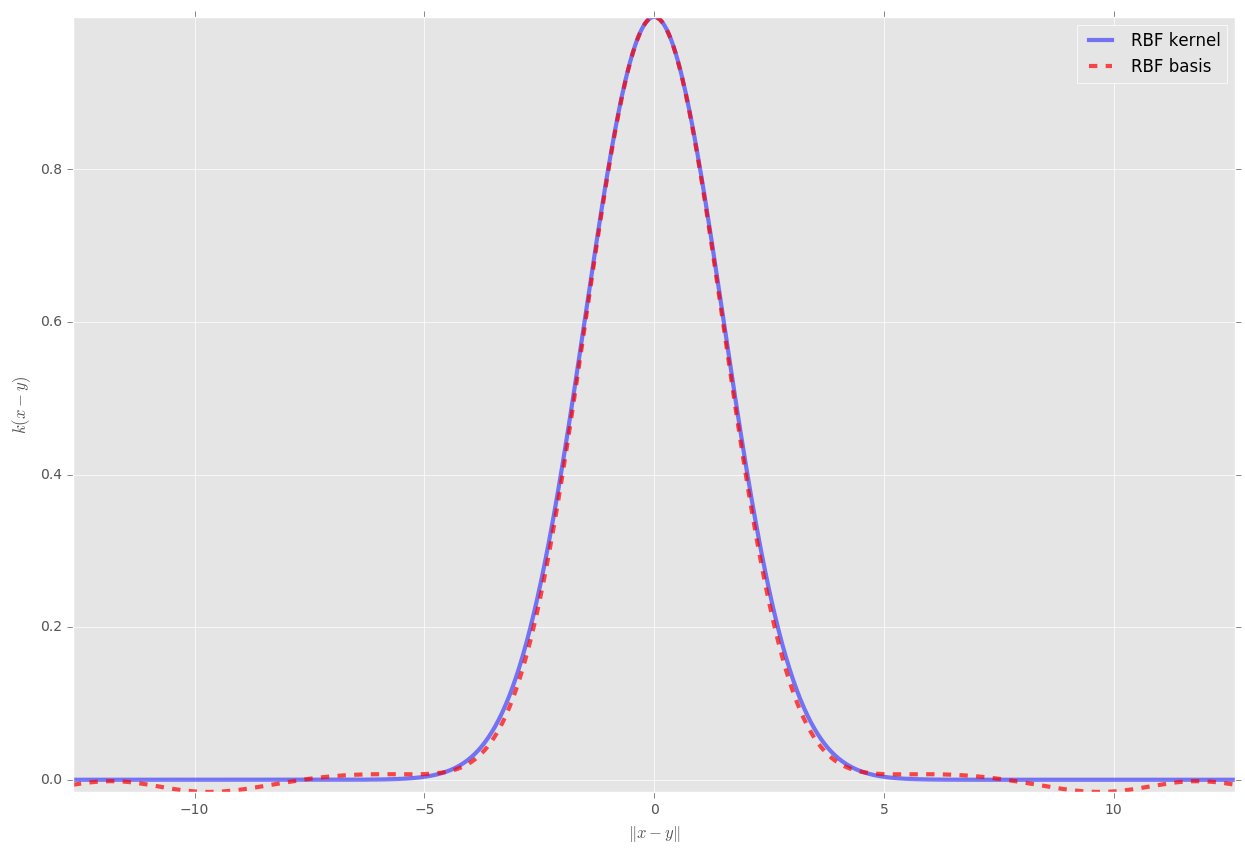

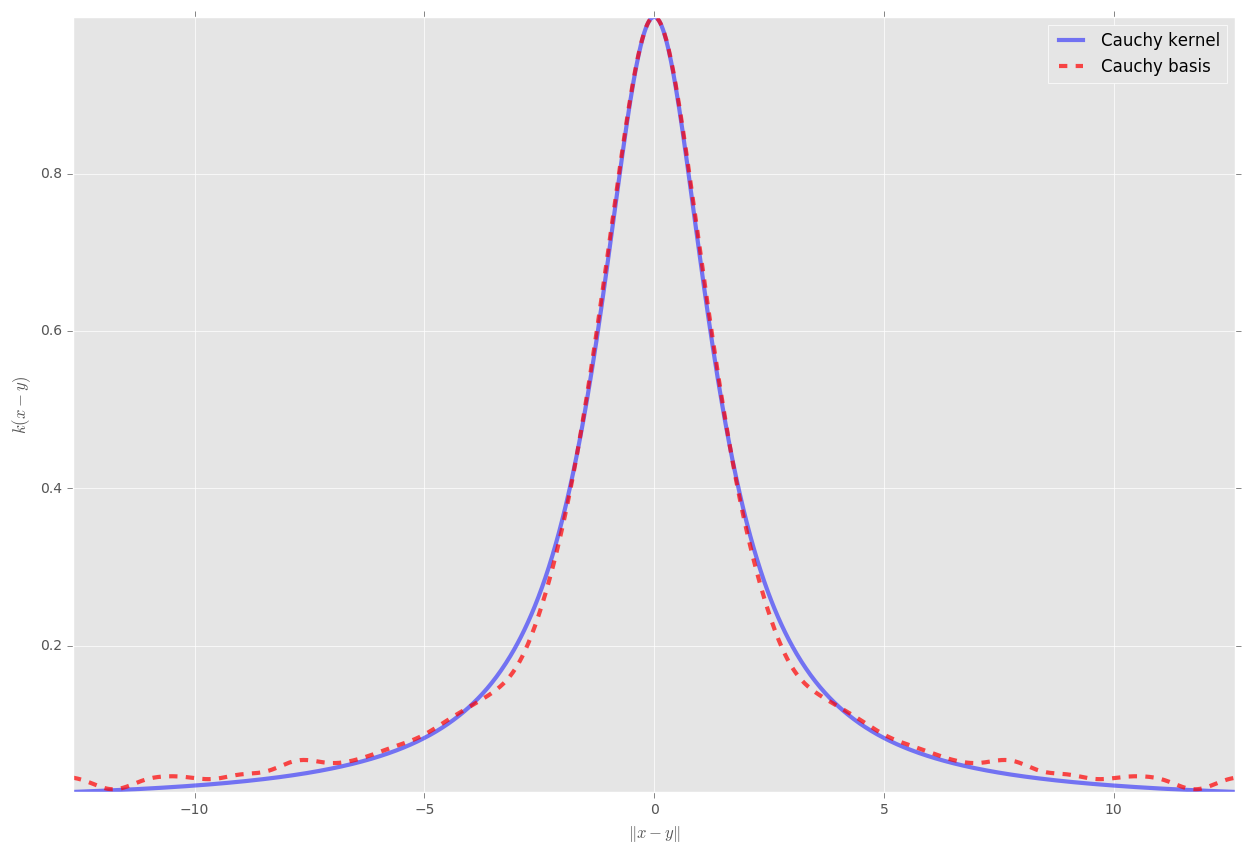

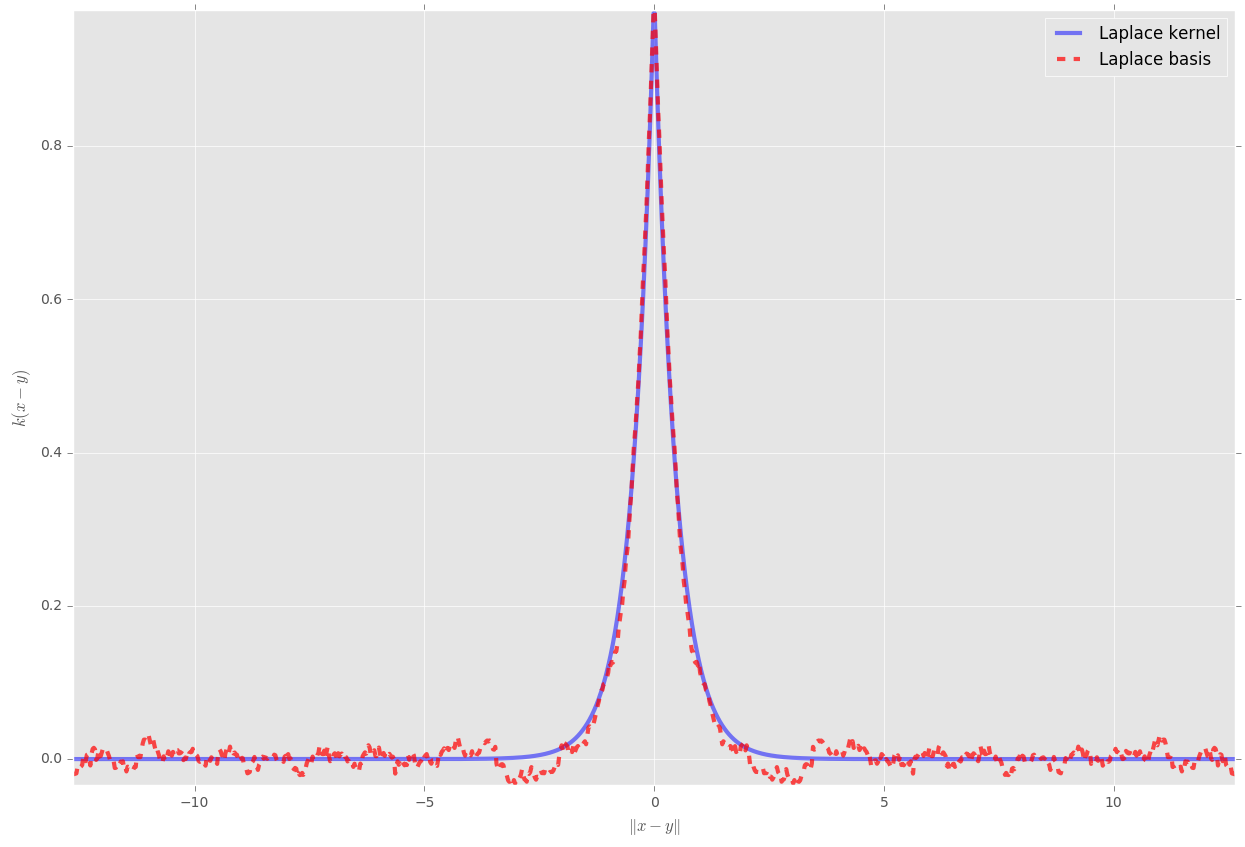

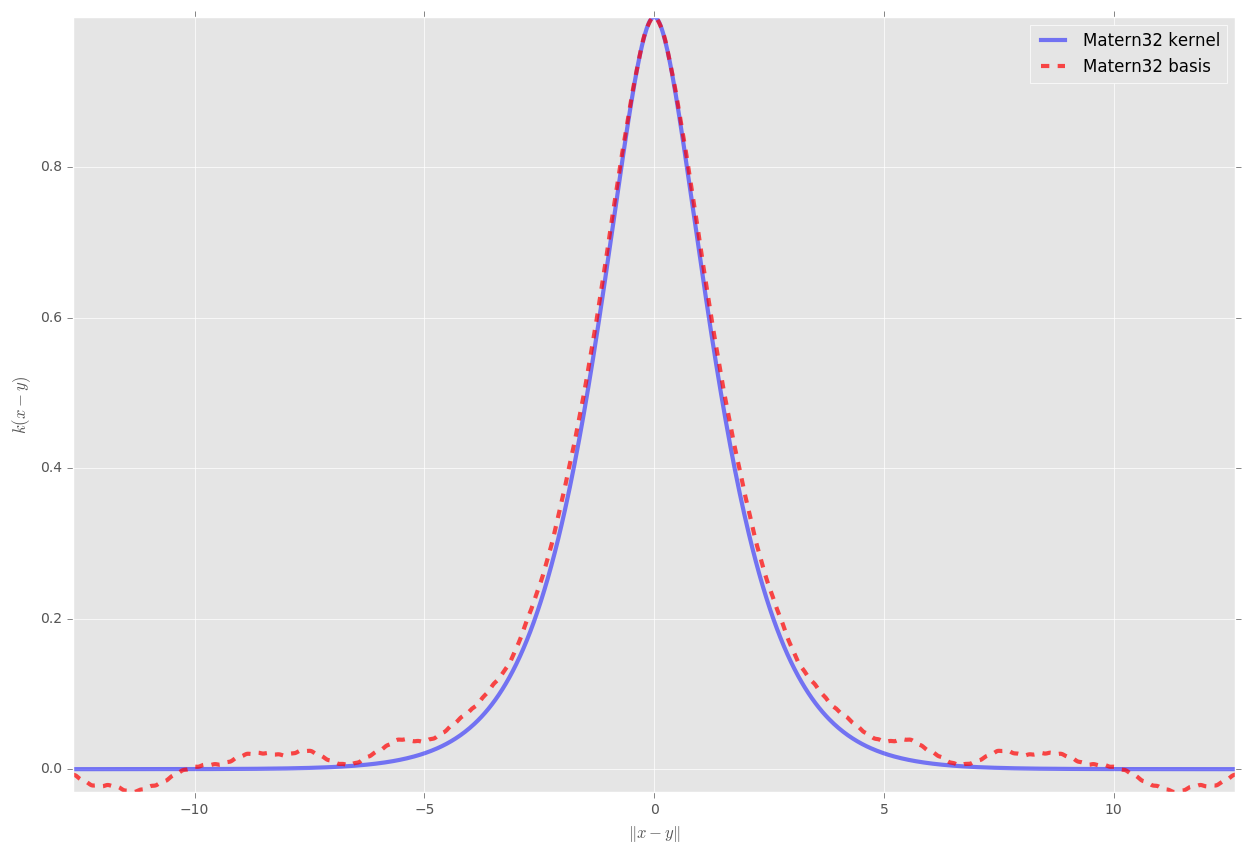

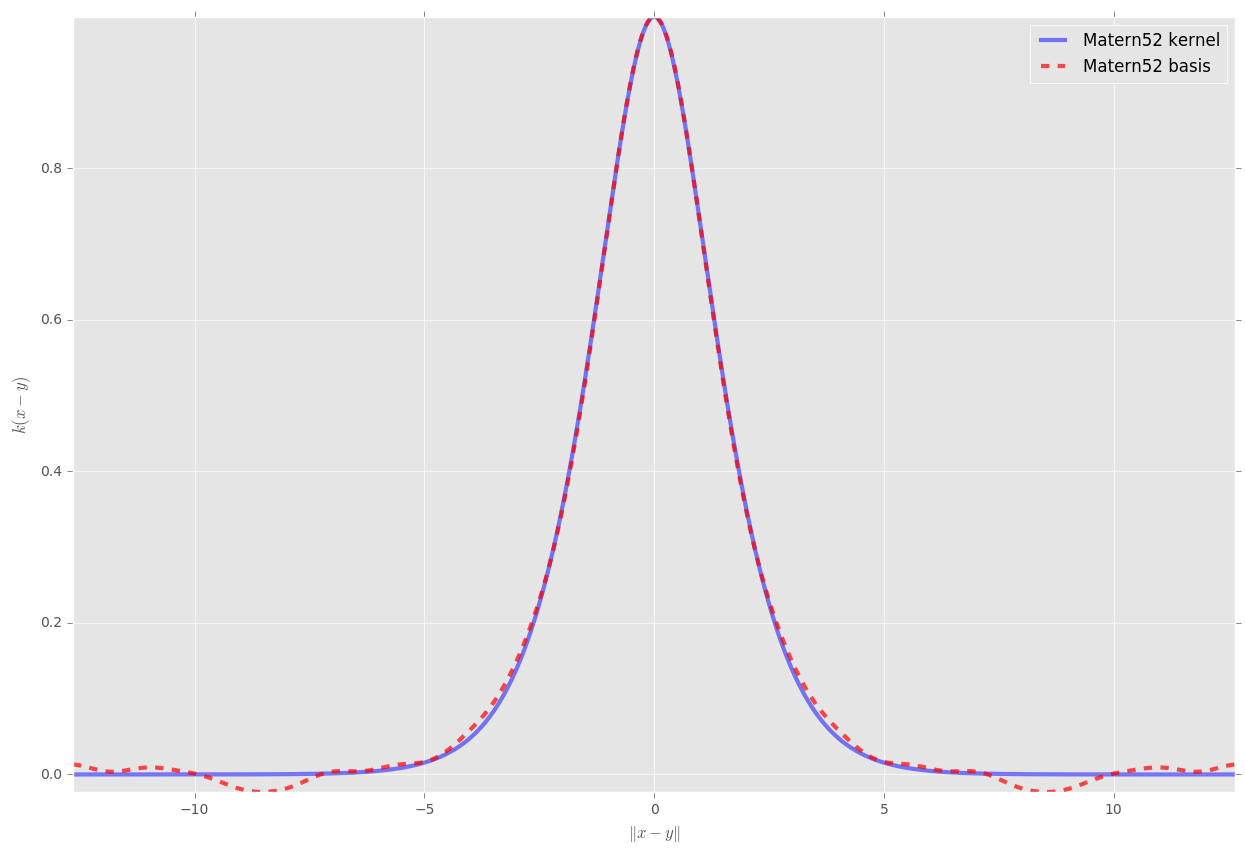

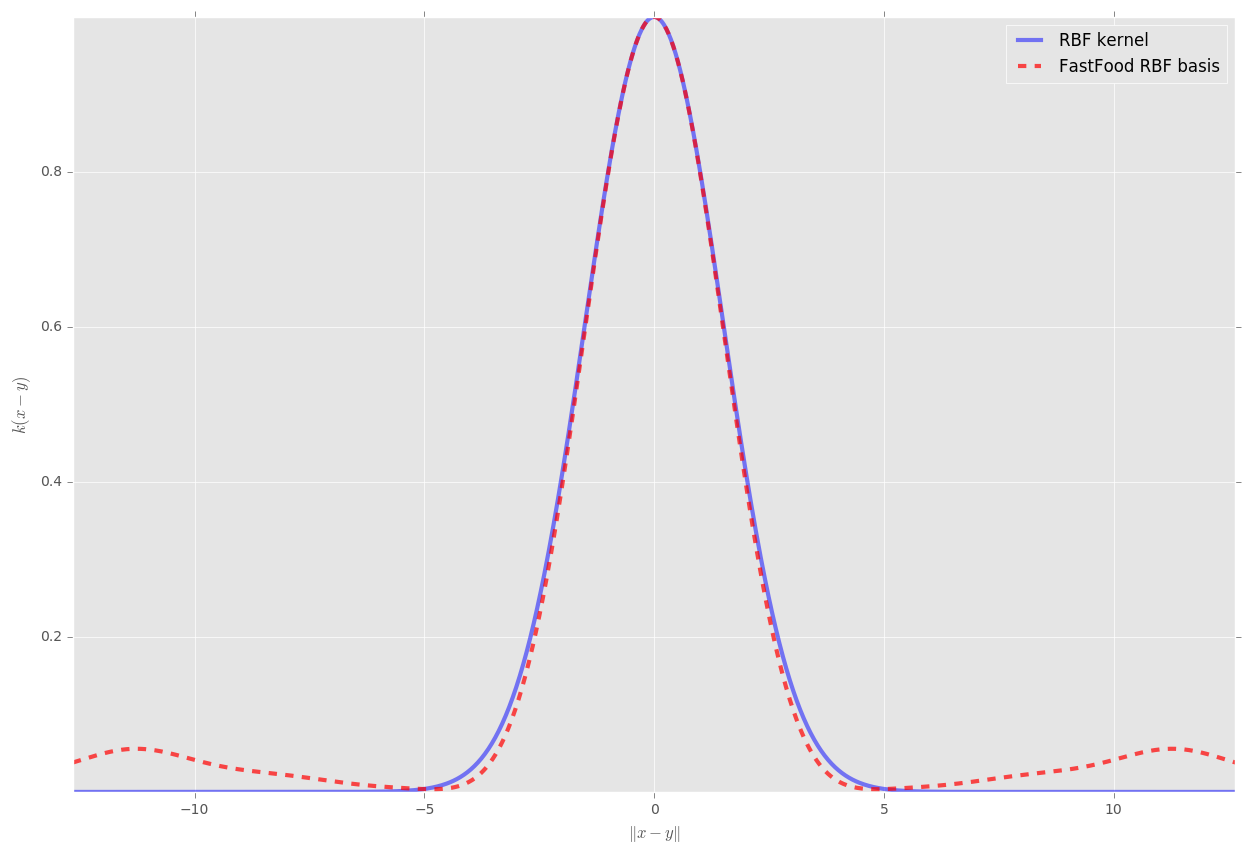

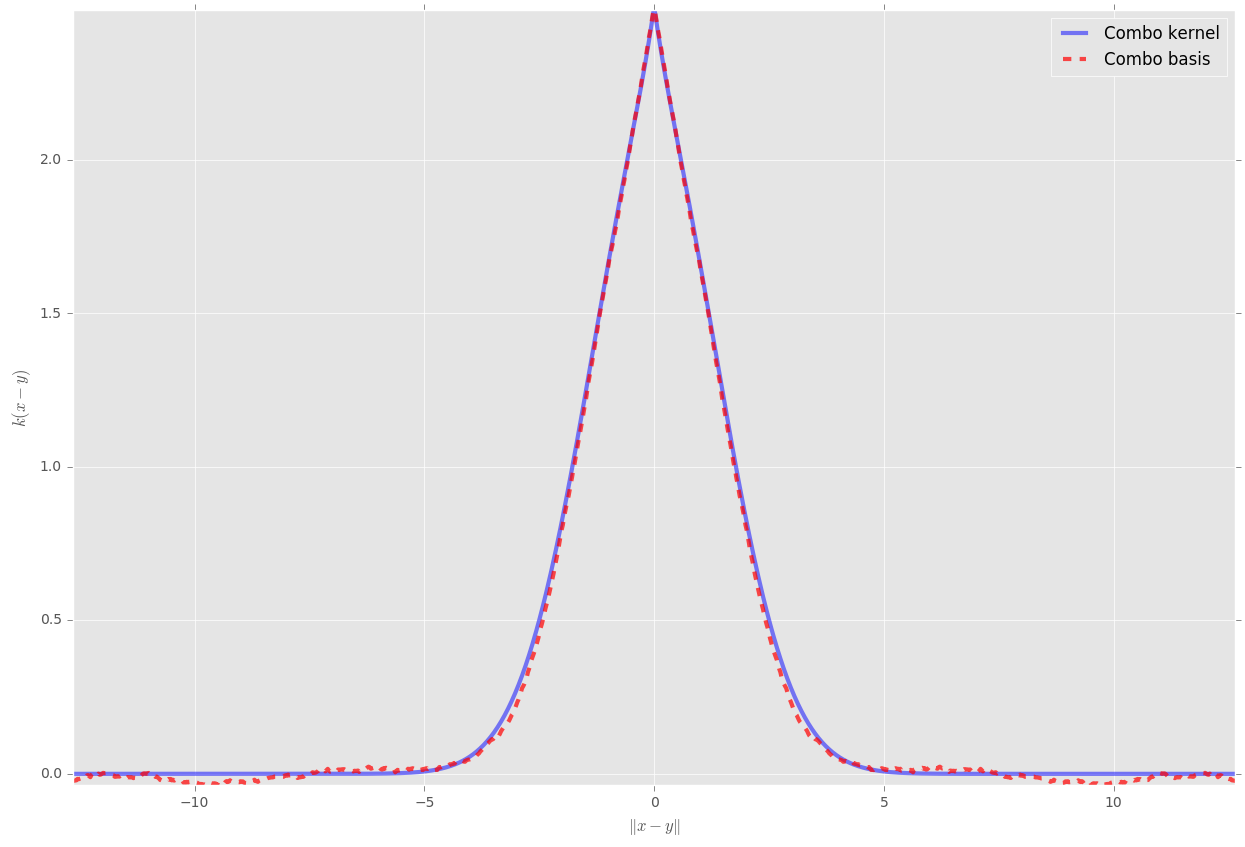

In [17]:
distfrom00 = np.sign(y[:, 0]) * np.sqrt(dist(power=2))
def plotkern(k1, k2, k1_label=None, k2_label=None):
    pl.figure(figsize=(15, 10))
    pl.plot(distfrom00, k1, 'b', linewidth=3, alpha=0.5, label=k1_label)
    pl.plot(distfrom00, k2, 'r--', linewidth=3, alpha=0.7, label=k2_label)
    pl.grid(True)
    pl.axis('tight')
    pl.xlabel('$\| x - y \|$')
    pl.ylabel('$k(x - y)$')
    pl.legend()
    pl.show()
    
plotkern(k_rbf, b_rbf, 'RBF kernel', 'RBF basis')
plotkern(k_cau, b_cau, 'Cauchy kernel', 'Cauchy basis')
plotkern(k_lap, b_lap, 'Laplace kernel', 'Laplace basis')
plotkern(k_m32, b_m32, 'Matern32 kernel', 'Matern32 basis')
plotkern(k_m52, b_m52, 'Matern52 kernel', 'Matern52 basis')
plotkern(k_rbf, f_rbf, 'RBF kernel', 'FastFood RBF basis')
plotkern(k_combo, f_combo, 'Combo kernel', 'Combo basis')